In [11]:
parking_data.head(5)

,동별(1),동별(2),2020,2020.1,2020.2,2020.3,2020.4,2020.5,2020.6,2020.7,...,2022.18,2022.19,2022.20,2022.21,2022.22,2022.23,2022.24,2022.25,2022.26,2022.27
0,동별(1),동별(2),합계,합계,합계,합계,합계,합계,노상,노상,...,노외,노외,건축물부설,건축물부설,건축물부설,건축물부설,건축물부설,건축물부설,건축물부설,건축물부설
1,동별(1),동별(2),소계,소계,공영,공영,민영,민영,소계,소계,...,민영,민영,소계,소계,일반주택,일반주택,공동주택,공동주택,일반건축물,일반건축물
2,동별(1),동별(2),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),...,개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수),개소 (개소),면수 (면수)
3,합계,소계,317181,4327614,12484,183441,304697,4144173,11407,112177,...,788,28279,296634,4296315,115597,282426,87393,2361583,93644,1652306
4,합계,종로구,7111,95048,197,6158,6914,88890,152,2136,...,60,1206,7987,85023,2658,6748,1448,25103,3881,53172


In [16]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

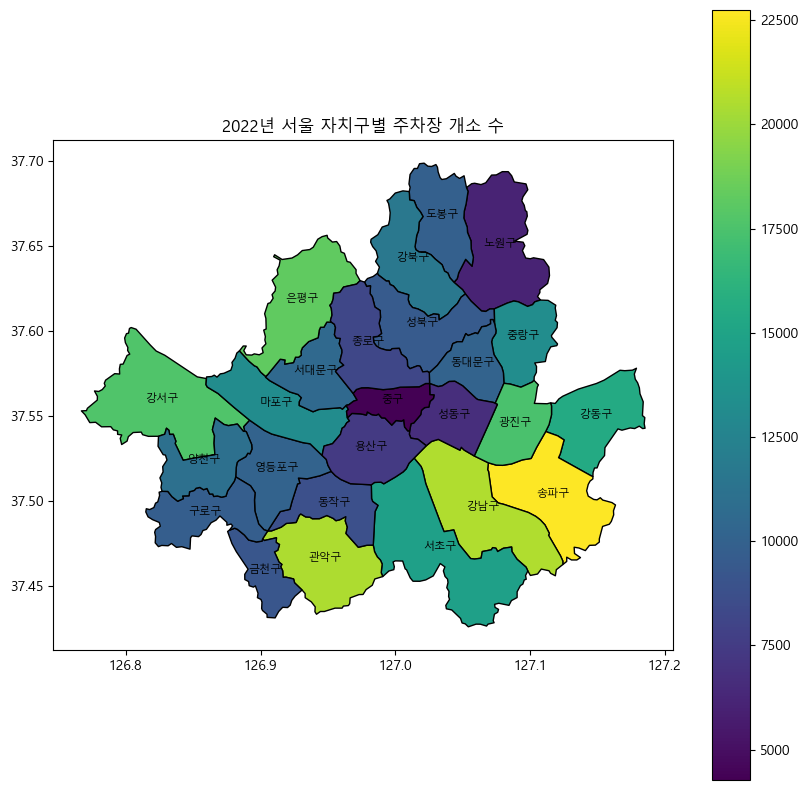

In [17]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# 주차장 데이터 불러오기
file_path = r'C:\Users\bluecom011\Desktop\공모전\주차장(동별)(2016년+이후)_20240118202906.csv'
parking_data = pd.read_csv(file_path)

# 필요한 컬럼만 선택하고, 자치구별로 그룹화하여 주차장 개소 수 합계 계산
parking_data_by_district = parking_data[['동별', '2022']].rename(columns={'동별': '자치구', '2022': '주차장 개소 수'})

# Filter out non-numeric values in the '주차장 개소 수' column
parking_data_by_district = parking_data_by_district[parking_data_by_district['주차장 개소 수'].apply(lambda x: x.isnumeric())]

# Convert the '주차장 개소 수' column to integers
parking_data_by_district['주차장 개소 수'] = parking_data_by_district['주차장 개소 수'].astype(int)

# 자치구별 주차장 개수 합계 계산
parking_totals_by_district = parking_data_by_district.groupby('자치구').sum()

# 경계 데이터 불러오기
boundary_file_path = 'https://raw.githubusercontent.com/southkorea/seoul-maps/master/kostat/2013/json/seoul_municipalities_geo_simple.json'
seoul_boundary = gpd.read_file(boundary_file_path)

# 주차장 데이터와 경계 데이터 병합
seoul_parking_map = seoul_boundary.merge(parking_totals_by_district, left_on='name', right_on='자치구')

# 지도 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
seoul_parking_map.plot(column='주차장 개소 수', ax=ax, legend=True, cmap='viridis', edgecolor='black')

# 자치구 이름 표시
for idx, row in seoul_parking_map.iterrows():
    plt.annotate(text=row['name'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y),
                 ha='center', fontsize=8)

ax.set_title('2022년 서울 자치구별 주차장 개소 수')
plt.show()
